# The Model


## 1) Single Categories
My idea is that people learn that each category A, B and C has a typical item, which is the item that occured most often in the category. People don't only remember that typical item, but also the dimension in which it occured. Therefore extra focus is on that dimension when a question of belonging to a category is asked. When the question is asked whether a testitem belongs to category X, the value that corresponds to the sum of occurences of the symptoms in the training set is stored. Then two cases have a big influence: (1) if in the dimension that matters for category X, the testitem has a typical element for another category, 5 gets subtracted from the value. (2) If in the important dimension for category X the typical element for category X occurs, 5 gets added. If generally other typical elements of other categories occur in other dimensions 2 gets subtracted.

This means the typical element and the belonging dimension of each category play the most important role. If in the for X important dimension something occurs that never occured for category X, 2 gets subtracted, 1 gets subtraced for an element that never occured in the other dimensions of category X. Finally 2 gets subtracted if a typical element of another category occurs (not in the for X important dimension).


## 2) Conjunctive Categories

My idea is that people learn how conjunctions work based on the two examples of A&B that they learned in the training set. These two examples both contained one typical element of A or B and one element that occured in the other categroy respectively. Based on this experience people judge other conjuctions of categories. So in order for them to be most sure that a testitem belongs to both category W and V it needs to either have one typical symptom of W and at least one symptom that occured in V in the training set or the other way round. If that both is not the case the average value of category W and V determines the categorization.




In [13]:
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot
import numpy as np


class Model:
    #data is input in form of array:[((A,X,C),A),((A,Y,Y),Y)...]
    def __init__(self,data):
        self.data=data

        #creating dictonaries for each category
        self.dic_A={}  
        self.dic_B={}
        self.dic_C={}

        #these attributes represent the "typical" symptoms and their dimension of each category. They occur as tuples of (symptom, dimension).
        self.a_typ=()  
        self.b_typ=()
        self.c_typ=()

#TRAIN

    #In the train function the attributes of the class get some actual content which depends on the training set.
    def train(self):
        #here the dictionary for A is created self.dic_A contains all symptoms as keys that ever occured with category A
        #the values in the dictonairy represent their amount of occurences
        for i in self.data:
            if i[-1]=="A":
                if i[0][0] in self.dic_A:
                    self.dic_A[i[0][0]]+=1
                else:
                    self.dic_A[i[0][0]]=1
                if i[0][1] in self.dic_A:
                      self.dic_A[i[0][1]]+=1
                else:
                    self.dic_A[i[0][1]]=1
                if i[0][2] in self.dic_A:
                      self.dic_A[i[0][2]]+=1
                else:
                    self.dic_A[i[0][2]]=1

        #the same is done for category B and self.dic_B
        for i in self.data:
            if i[-1]=="B":
                if i[0][0] in self.dic_B:
                    self.dic_B[i[0][0]]+=1
                else:
                    self.dic_B[i[0][0]]=1
                if i[0][1] in self.dic_B:
                      self.dic_B[i[0][1]]+=1
                else:
                    self.dic_B[i[0][1]]=1
                if i[0][2] in self.dic_B:
                      self.dic_B[i[0][2]]+=1
                else:
                    self.dic_B[i[0][2]]=1

        #the same is done for category C and self.dic_C     
        for i in self.data:
            if i[-1]=="C":
                if i[0][0] in self.dic_C:
                    self.dic_C[i[0][0]]+=1
                else:
                    self.dic_C[i[0][0]]=1
                if i[0][1] in self.dic_C:
                      self.dic_C[i[0][1]]+=1
                else:
                    self.dic_C[i[0][1]]=1
                if i[0][2] in self.dic_C:
                      self.dic_C[i[0][2]]+=1
                else:
                    self.dic_C[i[0][2]]=1


        #the typical values and dimensions for each category are obtained:
        key_a=max(self.dic_A, key=self.dic_A.get)
        self.a_typ=(key_a,int(key_a[1]))
        key_b=max(self.dic_B, key=self.dic_B.get)
        self.b_typ=(key_b,int(key_b[1]))
        key_c=max(self.dic_C, key=self.dic_C.get)
        self.c_typ=(key_c,int(key_c[1]))
        
        print("Occurences of symptoms of Category A:  ", self.dic_A)
        print("                                                      ")
        print("Typical value of A is ", self.a_typ[0], "in dimension ", self.a_typ[1])
        print("------------------------------------------------------")
        print("Occurences of symptoms of Category B:  ", self.dic_B)
        print("                                                      ")
        print("Typical value of B is ", self.b_typ[0], "in dimension ", self.b_typ[1])
        print("------------------------------------------------------")
        print("Occurences of symptoms of Category C:  ", self.dic_C)
        print("                                                      ")
        print("Typical value of C is ", self.c_typ[0], "in dimension ", self.c_typ[1])

#SINGLE CATEGORY FUNCTIONS          

    #this function gets a triple like (T1, V2, W3) as an input and returns a value that represents how sure the model is that the testitem belongs to category A.
    def categorie_A(self,testitem):

        #for each of the three elements in the testitem the function checks the value of the key in the dictionary
        #if a symptom never occured in the training set of category A, 1 gets subtracted
        #if a value occurs in the for A important category that never occured in the training set for A, 2 gets subtracted
        if testitem[0] in self.dic_A:
            value1= self.dic_A[testitem[0]] #the amount how often the first element in the testtriple occurs in the trainingset for A
        elif self.a_typ[1]-1==0:
            value1=-2 #if value never occured in training set AND now occurs in important category in testitem subtract 2
        else:
            value1=-1    #if value never occurs in training set for A: subtract 1
        
        #the same for the second symptom in the testitem
        if testitem[1] in self.dic_A:
            value2= self.dic_A[testitem[1]]
        elif self.a_typ[1]-1==1:
            value2=-2
        else:
            value2=-1
        
        #the same for the third symptom in the testitem
        if testitem[2] in self.dic_A:
            value3= self.dic_A[testitem[2]]
        elif self.a_typ[1]-1==2:
            value3=-2
        else:
            value3=-1
        
        #sum of these values for each symptom in testitem
        value=value1+value2+value3 


        if testitem[self.a_typ[1]-1]==self.a_typ[0]: #if in for A important dimension the for A typical element occurs
            value+=5
        if testitem[self.a_typ[1]-1]==self.b_typ[0] or testitem[self.a_typ[1]-1]==self.c_typ[0]: #if in for A importan dimension an element occurs that is important for B or C
            value-=5
        if testitem[self.b_typ[1]-1]==self.b_typ[0] and self.b_typ[1]!=self.a_typ[1]: #if typical item of B occurs in other dimension
            value-=2
        if testitem[self.c_typ[1]-1]==self.c_typ[0] and self.c_typ[1]!=self.a_typ[1]: #if typical item of C occurs in other dimension
            value-=2

        return (value)


    #this function just iterates over the five testitems in the testset 
    def category_A(self,testlist):
        a=[]
        for item in testlist: 
            a.append(self.categorie_A(item))
        return a


    #this function gets a triple like (T1, V2, W3) as an input and returns a value that represents how sure the model is that the testitem belongs to category B.
    def categorie_B(self,testitem):
        if testitem[0] in self.dic_B:
            value1= self.dic_B[testitem[0]] #the amount how often the first element in the testtriple occurs in the trainingset for B
        elif self.b_typ[1]-1==0:
            value1=-2 #if value never occurs plus in important category subtract 2
        else:
            value1=-1 #if value never occurs in B: subtract 1

        #the same for the second symptom in the testitem
        if testitem[1] in self.dic_B:
            value2= self.dic_B[testitem[1]]
        elif self.b_typ[1]-1==1:
            value2=-2
        else:
            value2=-1

        #the same for the third symptom in the testitem
        if testitem[2] in self.dic_B:
            value3= self.dic_B[testitem[2]]
        elif self.b_typ[1]-1==2:
            value3=-2
        else:
            value3=-1

        value=value1+value2+value3 #the sum of the occurences 

        if testitem[self.b_typ[1]-1]==self.b_typ[0]: #if in for B important dimension the for B typical element occurs
            value+=5
        if testitem[self.b_typ[1]-1]==self.a_typ[0] or testitem[self.b_typ[1]-1]==self.c_typ[0]: #if in for B important dimension an element occurs that is important for A or C
            value-=5
        if testitem[self.a_typ[1]-1]==self.a_typ[0] and self.a_typ[1]!=self.b_typ[1]: #if typical item of A occurs in other dimension
            value-=2
        if testitem[self.c_typ[1]-1]==self.c_typ[0] and self.c_typ[1]!=self.b_typ[1]: #if typical item of C occurs in other dimension
            value-=2

        return (value)

    #this function just iterates over the five testitems in the testset 
    def category_B(self,testlist):
        b=[]
        for item in testlist: 
            b.append(self.categorie_B(item))
        return b

    

    #this function gets a triple like (T1, V2, W3) as an input and returns a value that represents how sure the model is that the testitem belongs to category C.
    def categorie_C(self,testitem):
        if testitem[0] in self.dic_C:
            value1= self.dic_C[testitem[0]] #the amount how often the first element in the testtriple occurs in the trainingset for C
        elif self.c_typ[1]-1==0:
            value1=-2 #if value never occurs plus in important category subtract 2
        else:
            value1=-1 #if value never occurs in C: subtract 1

        #same is done for second symptom in testitem
        if testitem[1] in self.dic_C:
            value2= self.dic_C[testitem[1]]
        elif self.c_typ[1]-1==1:
            value2=-2
        else:
            value2=-1

        #same is done for third symptom in testitem
        if testitem[2] in self.dic_C:
            value3= self.dic_C[testitem[2]]
        elif self.c_typ[1]-1==2:
            value3=-2
        else:
            value3=-1
        value=value1+value2+value3 #the sum of the occurences 

        if testitem[self.c_typ[1]-1]==self.c_typ[0]: #if in for C important dimension the for C typical element occurs
            value+=5
        if testitem[self.c_typ[1]-1]==self.a_typ[0] or testitem[self.c_typ[1]-1]==self.b_typ[0]: #if in for C importan dimension an element occurs that is important for A or B
            value-=5
        if testitem[self.a_typ[1]-1]==self.a_typ[0] and self.a_typ[1]!=self.c_typ[1]: #if typical item of A occurs in other dimension
            value-=2
        if testitem[self.b_typ[1]-1]==self.b_typ[0] and self.b_typ[1]!=self.c_typ[1]: #if typical item of B occurs in other dimension
            value-=2

        
        return (value)

    #this function just iterates over the five testitems in the testset 
    def category_C(self,testlist):
        c=[]
        for item in testlist: 
            c.append(self.categorie_C(item))
        return c
        
#CONJUNCTIVE CATEGORY FUNCTIONS

    def categorie_A_B(self,testitem):

        #average value of the value for A and B that the model produces
        value=(self.categorie_A(testitem)+self.categorie_B(testitem))/2
        for symptom in testitem:
            #most sure about testitem belonging to A and B
            if symptom == self.a_typ[0] and (testitem[0] in self.dic_B or testitem[1] in self.dic_B or testitem[2] in self.dic_B): #typical value for A occurs in testitem AND at least one of the symptoms has occured for B in the training set
                value+=5
            elif symptom == self.b_typ[0] and (testitem[0] in self.dic_A or testitem[1] in self.dic_A or testitem[2] in self.dic_A): #typical value for B occurs in testitem AND at least one of the symptoms has occured for A in the training set
                value+=5

        return value


    #this function just iterates over the five testitems in the testset 
    def category_A_B(self,testlist):
        ab=[]
        for item in testlist: 
            ab.append(self.categorie_A_B(item))
        return ab



    def categorie_A_C(self,testitem):
        #average value of the value for A and C that the model produces
        value=(self.categorie_A(testitem)+self.categorie_C(testitem))/2
        for symptom in testitem:
            #most sure about testitem belonging to A and C
            if symptom == self.a_typ[0] and (testitem[0] in self.dic_C or testitem[1] in self.dic_C or testitem[2] in self.dic_C): #typical value for A occurs in testitem AND at least one of the symptoms has occured for C in the training set
                value+=5
            elif symptom == self.c_typ[0] and (testitem[0] in self.dic_A or testitem[1] in self.dic_A or testitem[2] in self.dic_A): #typical value for C occurs in testitem AND at least one of the symptoms has occured for A in the training set
                value+=5

        return value
    

    #this function just iterates over the five testitems in the testset 
    def category_A_C(self,testlist):
        ac=[]
        for item in testlist: 
            ac.append(self.categorie_A_C(item))
        return ac

    


    def categorie_B_C(self,testitem):
        
        #average value of the value for B and C that the model produces
        value=(self.categorie_B(testitem)+self.categorie_C(testitem))/2
        for symptom in testitem:
            #most sure about testitem belonging to B and C
            if symptom == self.b_typ[0] and (testitem[0] in self.dic_C or testitem[1] in self.dic_C or testitem[2] in self.dic_C): #typical value for B occurs in testitem AND at least one of the symptoms has occured for C in the training set
                value+=5
            elif symptom == self.c_typ[0] and (testitem[0] in self.dic_B or testitem[1] in self.dic_B or testitem[2] in self.dic_B): #typical value for C occurs in testitem AND at least one of the symptoms has occured for B in the training set
                value+=5

        return value


    #this function just iterates over the five testitems in the testset 
    def category_B_C(self,testlist):
        bc=[]
        for item in testlist: 
            bc.append(self.categorie_B_C(item))
        return bc



        


# Creating the Model with the training data. 
The dictionaries with the occurences of symptoms for each category and their typical values are being created.

In [14]:
Model1=Model([(("T1","X2","W3"),"A"),
(("T1","Y2","Y3"), "A"),
(("T1","T2",	"X3"), "A"),
(("Y1",	"T2",	"Y3"), "A"),
(("X1",	"T2","V3"), "A&B"),
(("T1",	"V2","X3"), "A&B"),
(("Z1",	"V2",	"V3"),	"B"),
(("X1",	"V2",	"V3"),	 "B"),
(("Y1",	"X2","V3"),	"B"),
(("Z1",	"Y2"	,"V3"),	 "B"),
(("W1",	"T2",	"Y3"),	 "C"),
(("W1",	"X2",	"V3"),"C"),
(("W1",	"Y2",	"W3"), "C"),
(("W1",	"T2",	"W3"), "C"),
(("W1",	"X2","W3"), "C"),
(("X1","Y2","W3"),"C")])
Model1.train()



Occurences of symptoms of Category A:   {'T1': 3, 'X2': 1, 'W3': 1, 'Y2': 1, 'Y3': 2, 'T2': 2, 'X3': 1, 'Y1': 1}
                                                      
Typical value of A is  T1 in dimension  1
------------------------------------------------------
Occurences of symptoms of Category B:   {'Z1': 2, 'V2': 2, 'V3': 4, 'X1': 1, 'Y1': 1, 'X2': 1, 'Y2': 1}
                                                      
Typical value of B is  V3 in dimension  3
------------------------------------------------------
Occurences of symptoms of Category C:   {'W1': 5, 'T2': 2, 'Y3': 1, 'X2': 2, 'V3': 1, 'Y2': 2, 'W3': 4, 'X1': 1}
                                                      
Typical value of C is  W1 in dimension  1


# Testing the model on the test data.

In [15]:

testset=(("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),
("X1",	"X2","V3"))

#computing the means and standart deviation seperatly for the single and conjunctive categories

#mean and std for single categories
meansinglecategory=np.mean(np.array([Model1.category_A(testset)+Model1.category_B(testset)+Model1.category_C(testset)]))
stdsinglecategory=np.std(np.array([Model1.category_A(testset)+Model1.category_B(testset)+Model1.category_C(testset)]))

#mean and std for conjunctive categories
meanconjcategory=np.mean(np.array([Model1.category_A_B(testset)+Model1.category_A_C(testset)+Model1.category_B_C(testset)]))
stdconjcategory=np.std(np.array([Model1.category_A_B(testset)+Model1.category_A_C(testset)+Model1.category_B_C(testset)]))

#data produced by the experiment
averages =[6.78,
-9.33,
-3.11,
-3.06,
-1.39,
-2.00,
-3.22,
-5.28,
-0.56,
7.00,
-9.06,
6.11,
-3.78,
0.22,
-7.00,
1.17,
-8.56,
-3.72,
-2.72,
-3.33,
-5.39,
-4.06,
-1.06,
-5.06,
-7.28,
-7.83,
4.33,
-4.72,
-1.67,
-0.89 ]


#computing the mean and the standard deviation of the experiment data
meanaverages=np.mean(np.array(averages))
stdaverages=np.std(np.array(averages))

#printing all the means and std's
print("mean value of experiment data", meanaverages)
print("standard deviation of experiment data", stdaverages)
print("  ")
print("mean value of single categories",meansinglecategory)
print ("standard deviation of single categories", stdsinglecategory)
print("  ")
print("mean value of conjunctive categories",meanconjcategory)
print ("standard deviation of conjunctive categories", stdconjcategory)
print("  ")
print("  ")

#normalizing the data of the single category model values, the conjunctive category model values and the experiment data

#arrays of values the model produces 
modelABC=Model1.category_A(testset)+Model1.category_B(testset)+Model1.category_C(testset)
modelconj=Model1.category_A_B(testset)+Model1.category_A_C(testset)+Model1.category_B_C(testset)
modelvalues=modelABC+modelconj

#three different arrays for storing the zscores
zscoresmodelsingle=[]
zscoresmodelconj=[]
zscoresexperiment=[]
for i in modelABC:
    zscoresmodelsingle.append((i-meansinglecategory)/stdsinglecategory)
for i in modelconj:
    zscoresmodelconj.append((i-meanconjcategory)/stdconjcategory)

#putting the zscores from the single category and from the conjunctive category in one array
zscores=zscoresmodelsingle+zscoresmodelconj

#computing the zscores for the experiment data
for i in averages:
    zscoresexperiment.append((i-meanaverages)/stdaverages)

#calculating the correlation from the zscores
correlation=0
for i in range(len(zscores)):
    correlation+=zscores[i]*zscoresexperiment[i]
correlation/=29
print( "The correlation is",correlation)



#creating an array that contains information about whether model and experiment data agree
boolean=[]
for i in range(len(zscores)):
    if zscores[i]*zscoresexperiment[i] > 0:
        boolean.append(True)
    else:
        boolean.append(False)


#creating a data frame with all the model values, the experiment data and the zscores
d = { 'Category': ["Category A", "Category A", "Category A", "Category A", "Category A", "Category B","Category B","Category B","Category B","Category B", "Category C","Category C","Category C","Category C","Category C", "Category A&B","Category A&B","Category A&B","Category A&B","Category A&B","Category A&C","Category A&C","Category A&C","Category A&C","Category A&C","Category B&C","Category B&C","Category B&C","Category B&C","Category B&C" ], 'Model Value': modelvalues, "Experiment Averages": averages, "Zscores Model": zscores, "Zscores Experiment": zscoresexperiment, "Agreement of Model and Experiment": boolean}
pd.DataFrame(data=d, index=[("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),("X1",	"X2","V3"),("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),("X1",	"X2","V3"),("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),("X1",	"X2","V3"),("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),("X1",	"X2","V3"),("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),("X1",	"X2","V3"),("T1","V2","Y3"),
("W1",	"Y2","V3"), 
("Y1",	"T2","W3"),  
("X1",	"V2","W3"),("X1",	"X2","V3")])






mean value of experiment data -2.615666666666667
standard deviation of experiment data 4.325094745269236
  
mean value of single categories 1.7333333333333334
standard deviation of single categories 6.01627422542852
  
mean value of conjunctive categories 4.4
standard deviation of conjunctive categories 5.64859864627207
  
  
The correlation is 0.7822959633645856


,Category,Model Value,Experiment Averages,Zscores Model,Zscores Experiment,Agreement of Model and Experiment
"(T1, V2, Y3)",Category A,9.0,6.78,1.207835,2.172361,True
"(W1, Y2, V3)",Category A,-9.0,-9.33,-1.784050,-1.552413,True
"(Y1, T2, W3)",Category A,4.0,-3.11,0.376756,-0.114294,False
"(X1, V2, W3)",Category A,-2.0,-3.06,-0.620539,-0.102734,True
"(X1, X2, V3)",Category A,-4.0,-1.39,-0.952971,0.283385,False
"(T1, V2, Y3)",Category B,-3.0,-2.00,-0.786755,0.142348,False
"(W1, Y2, V3)",Category B,7.0,-3.22,0.875403,-0.139727,False
"(Y1, T2, W3)",Category B,-2.0,-5.28,-0.620539,-0.616017,True
"(X1, V2, W3)",Category B,1.0,-0.56,-0.121892,0.475288,False
"(X1, X2, V3)",Category B,11.0,7.00,1.540267,2.223227,True


# Scatterplots

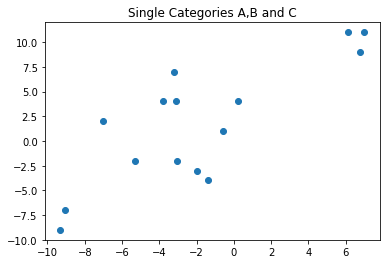

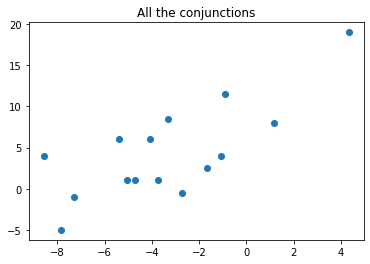

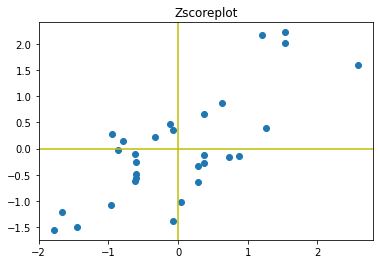

In [16]:

#splitting the experiment data into the single category values and conjunctive values

averagesABC=averages[:15]
averageconj=[1.17,
-8.56,
-3.72,
-2.72,
-3.33,-5.39,
-4.06,
-1.06,
-5.06,
-7.28,-7.83,
4.33,
-4.72,
-1.67,
-0.89]



#making a scatterplot of the single category values
matplotlib.pyplot.scatter(averagesABC,modelABC , s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 
matplotlib.pyplot.title("Single Categories A,B and C")
matplotlib.pyplot.show()

#making a scatterplot of the conjunctive category values
matplotlib.pyplot.scatter(averageconj,modelconj , s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 
matplotlib.pyplot.title("All the conjunctions")
matplotlib.pyplot.show()


#making a scatterplot of the zscores
matplotlib.pyplot.scatter(zscores, zscoresexperiment , s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 
matplotlib.pyplot.title("Zscoreplot")
matplotlib.pyplot.axvline(0, color='y')
matplotlib.pyplot.axhline(0, color='y')
matplotlib.pyplot.show()





